In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
housing = fetch_california_housing()

In [6]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
X,y= housing['data'],housing['target']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.neighbors import KNeighborsRegressor


In [15]:
knn = KNeighborsRegressor(n_neighbors=5,weights='uniform',p=2)

In [16]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [17]:
knn.predict(X_test)

array([2.069202, 2.453   , 1.5776  , ..., 2.2028  , 2.1584  , 1.4392  ])

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
mean_squared_error(y_test,knn.predict(X_test))

1.1153575207893798

In [20]:
r2_score(y_test,knn.predict(X_test))

0.16470988133616316

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid_search=GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors':[1,5,10,20],
        'weights':['uniform','distance'],
        'p':[1,2,3]
    }

)

In [23]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 10, 20], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [24]:
grid_search.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [25]:
mean_squared_error(y_test,grid_search.predict(X_test))

0.9468527550958902

In [26]:
r2_score(y_test,grid_search.predict(X_test))

0.29090292985026

In [27]:
metrics=[]
for n in range (1,30,3):
    knn= KNeighborsRegressor(n_neighbors=n,weights='distance',p=1)
    knn.fit(X_train,y_train)
    metrics.append(mean_squared_error(y_test,knn.predict(X_test)))

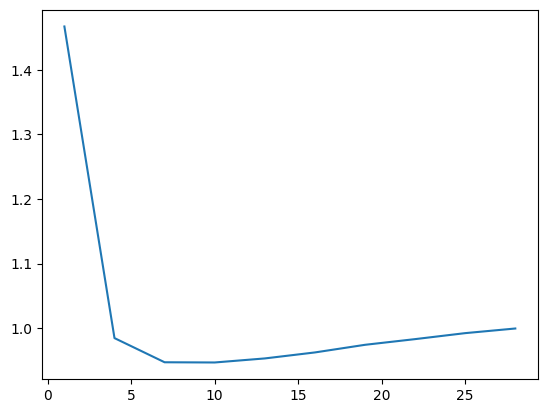

In [29]:
plt.plot(range (1,30,3),metrics)

In [30]:
from sklearn.datasets import make_moons

In [31]:
X,y = make_moons()

In [32]:
X.shape

(100, 2)

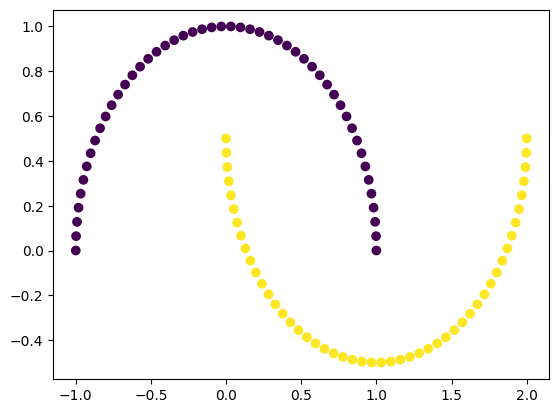

In [34]:
plt.scatter(X[:,0],X[:,1],c=y)

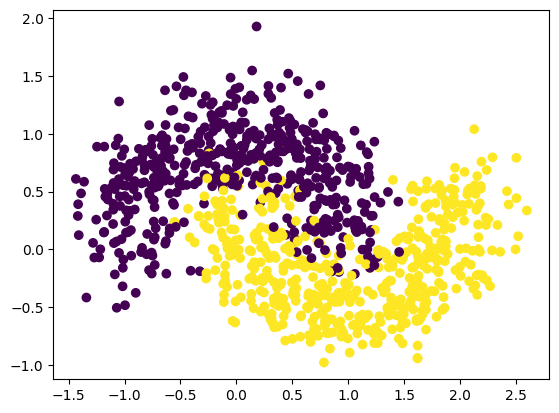

In [35]:
X,y = make_moons(noise=0.25,n_samples=1000)
plt.scatter(X[:,0],X[:,1],c=y)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
knn.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,knn.predict(X_test))

0.93

In [56]:
metrics=[]
for n in range (1,30,3):
    knn= KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    metrics.append(accuracy_score(y_test,knn.predict(X_test)))

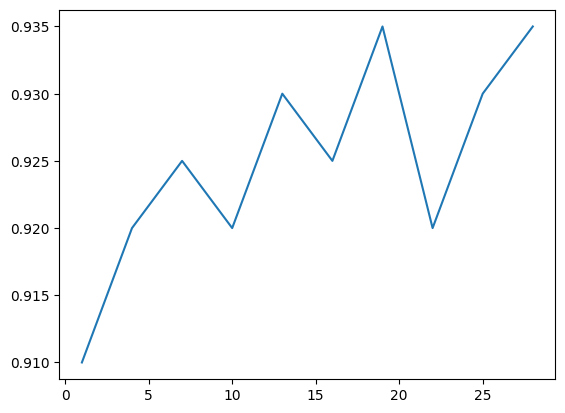

In [57]:
plt.plot(range (1,30,3),metrics)

In [49]:
metrics

[0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93]

In [44]:
accuracy_score(y_test,grid_search.predict(X_test))

0.925

In [58]:
import numpy as np 

In [61]:
x_space = np.linspace(-2,2,100)
x_grid,y_grid=np.meshgrid(x_space,x_space)
xy= np.stack([x_grid,y_grid],axis=2).reshape(-1,2)

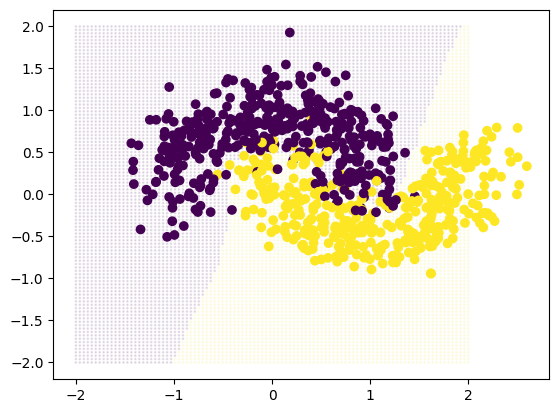

In [63]:
plt.scatter(xy[:,0],xy[:,1],s=1,alpha=0.1,c=knn.predict(xy))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

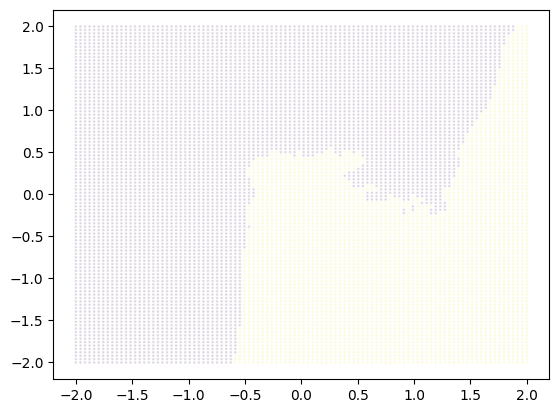

In [69]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

x_space = np.linspace(-2,2,100)
x_grid,y_grid=np.meshgrid(x_space,x_space)
xy= np.stack([x_grid,y_grid],axis=2).reshape(-1,2)

plt.scatter(xy[:,0],xy[:,1],s=1,alpha=0.1,c=knn.predict(xy))
#plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
